In [450]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [451]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
#haberman = pd.read_csv("haberman.csv")
haberman = pd.read_csv("/content/drive/MyDrive/APDS/Project/haberman.csv")

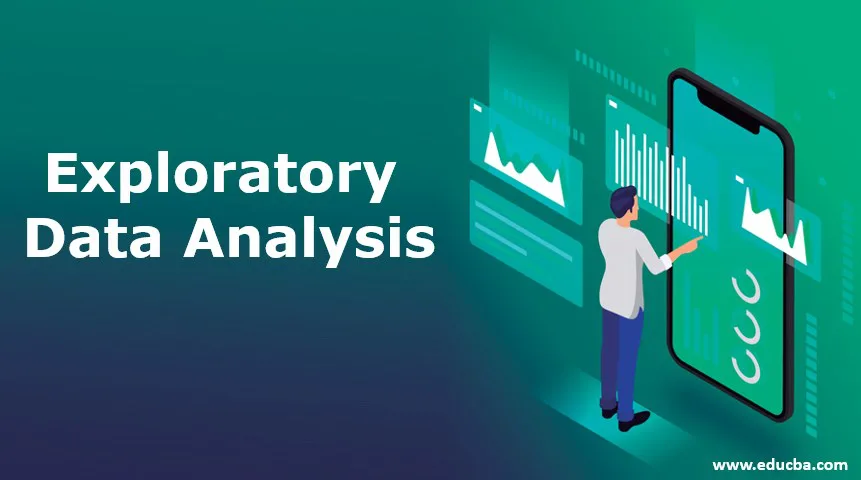

In [452]:
# Print first 5 lines of dataset
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [453]:
# Personal preference: convert year format from 'YY' to 'YYYY'
haberman['year'] = haberman['year'] + 1900
# Again, personal preference: convert survival status 1 and 2 to #'yes' and 'no', respectively
haberman['status'] = haberman['status'].map({1:'yes', 2: 'no'})
# Print first 5 lines of altered dataset
haberman.head()

,age,year,nodes,status
0,30,1964,1,yes
1,30,1962,3,yes
2,30,1965,0,yes
3,31,1959,2,yes
4,31,1965,4,yes


In [454]:
# Print the number of rows and columns for the dataset
haberman.shape

(306, 4)

In [455]:
# Print the column names in dataset and the data type
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [456]:
# Details about the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [457]:
# Statistically describe the dataset
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,1958.000000,0.000000
25%,44.000000,1960.000000,0.000000
50%,52.000000,1963.000000,1.000000
75%,60.750000,1965.750000,4.000000
max,83.000000,1969.000000,52.000000


In [458]:
# Count each type of status in the dataset
haberman["status"].value_counts()

yes    225
no      81
Name: status, dtype: int64

In [459]:
# Create a 'yes status' dataset to store 'yes' values for the patients that survived
status_yes = haberman[haberman["status"] == 'yes']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,1962.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,1958.000000,0.000000
25%,43.000000,1960.000000,0.000000
50%,52.000000,1963.000000,0.000000
75%,60.000000,1966.000000,3.000000
max,77.000000,1969.000000,46.000000


In [460]:
# Create a 'no status' dataset to store values for the patients that did not survive
status_no = haberman[haberman["status"] == 'no']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,1962.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,1958.000000,0.000000
25%,46.000000,1959.000000,1.000000
50%,53.000000,1963.000000,4.000000
75%,61.000000,1965.000000,11.000000
max,83.000000,1969.000000,52.000000


### Observations:
On Age: The difference between the mean age and year of no vs yes dataset isn’t statistically significant.
Note: There is however, a trend that describes a general increase in the age of the patients who did not survive surgery after 5 years. This increase can be seen in the minimum age, the percent quartiles and the maximum age of the non-survived patients.
On Year: The difference between the mean year and of the no vs yes dataset isn’t statistically significant.
On Nodes: There is a noticeable increase in the mean number of nodes found for the ‘yes dataset’ and the ‘no dataset’. There is also an increase in the maximum number of nodes found in the ‘no dataset’. The percent quartiles were also higher for the no dataset than the yes dataset. Note: For example, for the 75% of patients who died within 5 years after surgery they were found to have 11 nodes or more compared to only 3 nodes for the patients that did survive.
### Model Insight:

On average, those who survived have about 2.5 times less nodes than those who did not survive. For those who survived they held an average of 2.79 nodes versus the 7.46 nodes for the patients that did not survive.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


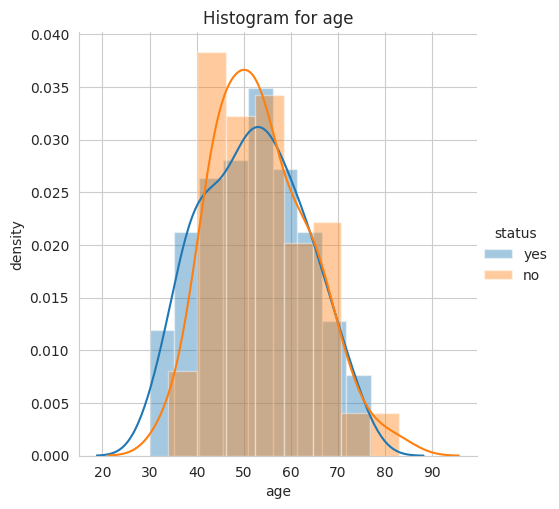

In [461]:
  # Create a function for PDF analysis
def histo_pdf(featureVar, classVar):
    sns.FacetGrid(data = haberman, hue = classVar, height = 5) \
    .map(sns.distplot, featureVar) \
    .add_legend();
    plt.title("Histogram for " + featureVar)
    plt.ylabel("density")
    plt.savefig('histogram_2.png')

# PDF histogram for age v. status
histo_pdf('age', 'status')


### Observations:
Major overlapping is observed, which suggests that age isn’t a major determining factor in the patients likihood of survival.
Differences between the age of the yes dataset and no dataset are barely observable given the amount of overlap in the PDF. Perhaps another statistical method can unearth a pattern between age and survival status.
Model Insights:

Ages 30–40 had a higher chance of survival, whereas ages 40–60 did not. For ages 60+ the chances of survival were about 50/50.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


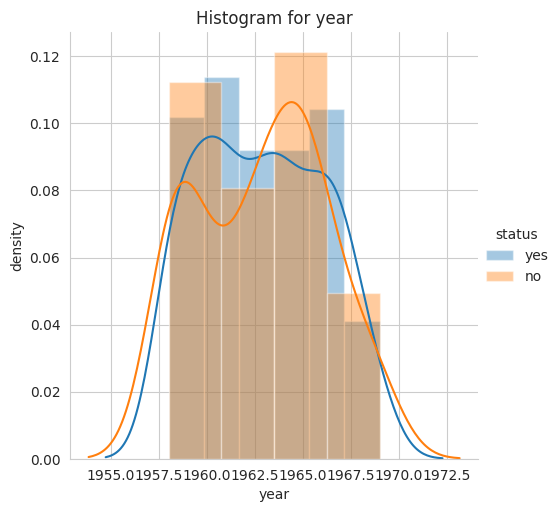

In [462]:
# PDF histogram for year v. status
histo_pdf('year', 'status')

### Observations:
Major overlapping continues again suggesting that the year of the patient’s surgical procedure did not affect their survival rate/outcome after 5 years.
There was a spike in the death rate for patients whose surgery was in year 1965 and a decrease for procedures done in 1960.
Patient’s likelihood of survival was up between 1960–1962.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


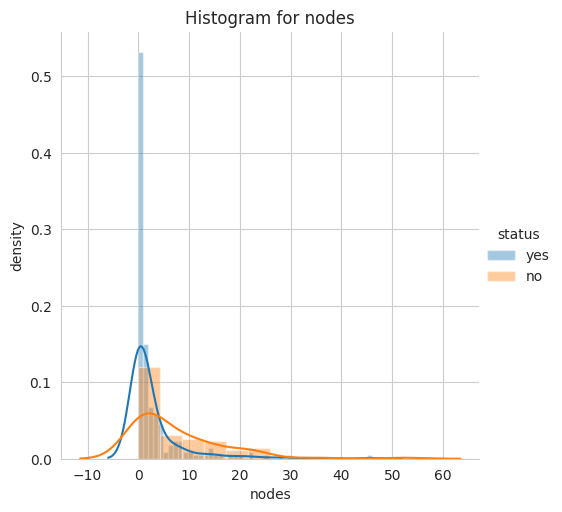

In [463]:
# PDF histogram for nodes v. status
histo_pdf('nodes', 'status')

### Observations:
Complete separation would be ideal to distinguish the exact number of nodes for patients who survived.
Patients with 0 nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.
This plot has shown that the number of nodes seem to influence the survival rate of patients more so than age and year of operation.
### Model Insight:

Patient non-survival increasingly likely after 5 nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
---------------------------------------------------------
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568] [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


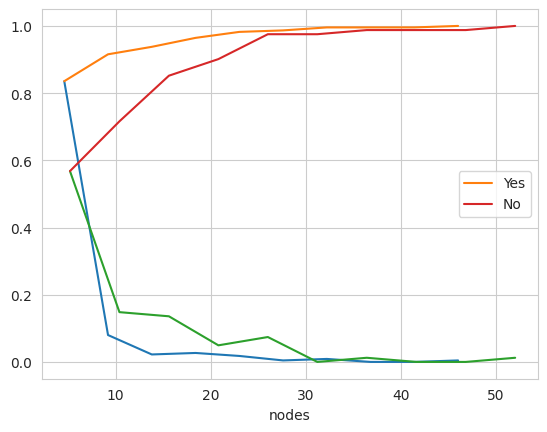

In [464]:
# Cumulative Distribution Function analysis
count1, bin_edges1 = np.histogram(status_yes['nodes'], bins = 10, density = True)
pdf1 = count1/(sum(count1))
print(pdf1, bin_edges1);
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("---------------------------------------------------------")
count2, bin_edges2 = np.histogram(status_no['nodes'], bins = 10, density = True)
pdf2 = count2/(sum(count2))
print(pdf2, bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

### Observations:
Approximately 83.55% of patients who survived had nodes in the 0 to 4.6 range as per the CDF summary stats.

<Figure size 640x480 with 0 Axes>

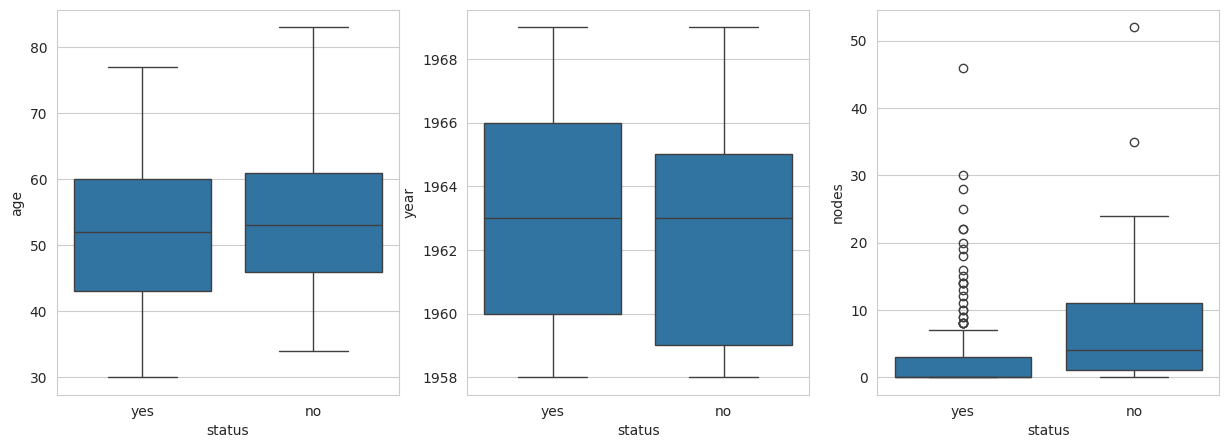

In [465]:
# Create box and whisker plot for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.boxplot(x = 'status', y = 'age', data = haberman)
plt.subplot(132)
sns.boxplot(x = 'status', y = 'year', data = haberman)
plt.subplot(133)
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.show()

<Figure size 640x480 with 0 Axes>

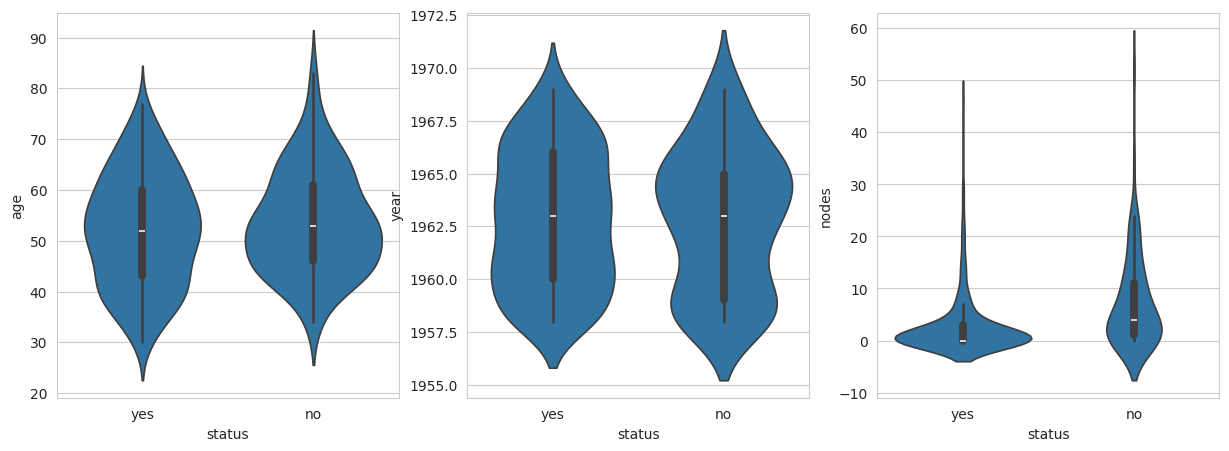

In [466]:
# Create violin plots for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.violinplot(x = "status", y = "age", data = haberman)  # Corrected
plt.subplot(132)
sns.violinplot(x = "status", y = "year", data = haberman)  # Corrected
plt.subplot(133)
sns.violinplot(x = "status", y = "nodes", data = haberman)  # Corrected
plt.show()

### Observations:

There were comparatively more people in the age group 45 to 65 who did not survive. However, patient age alone is not an important parameter in determining their survival.
There were more people operated on in the year 1965 that did not survive beyond 5 years.
Patients with more than 1 node are less likely to survive. Generally, more nodes hint toward a decreased survival rate.
A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had 0 positive axillary nodes, who died within 5 years of operation, thus an absence of positive axillary nodes cannot guarantee survival.
The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

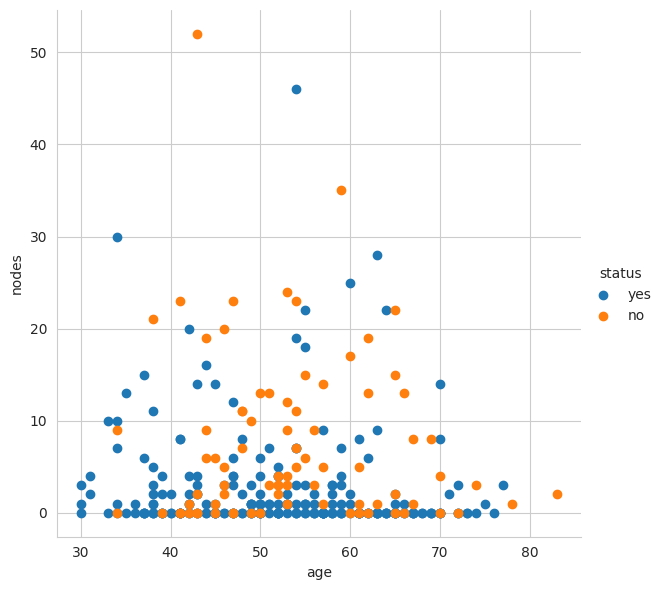

In [467]:
# Create scatter plot of age v nodes
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = "status", height = 6)\
.map(plt.scatter, "age", "nodes")\
.add_legend()
plt.show()

### Observations:

Patients with 0 to 15 nodes aged between 30 and 40 are more likely to survive.
Irrespective of age patients with 0 to 1 nodes are more likely to survive.
Patients aged 50+ with 5+ nodes are more likely to have not survived.

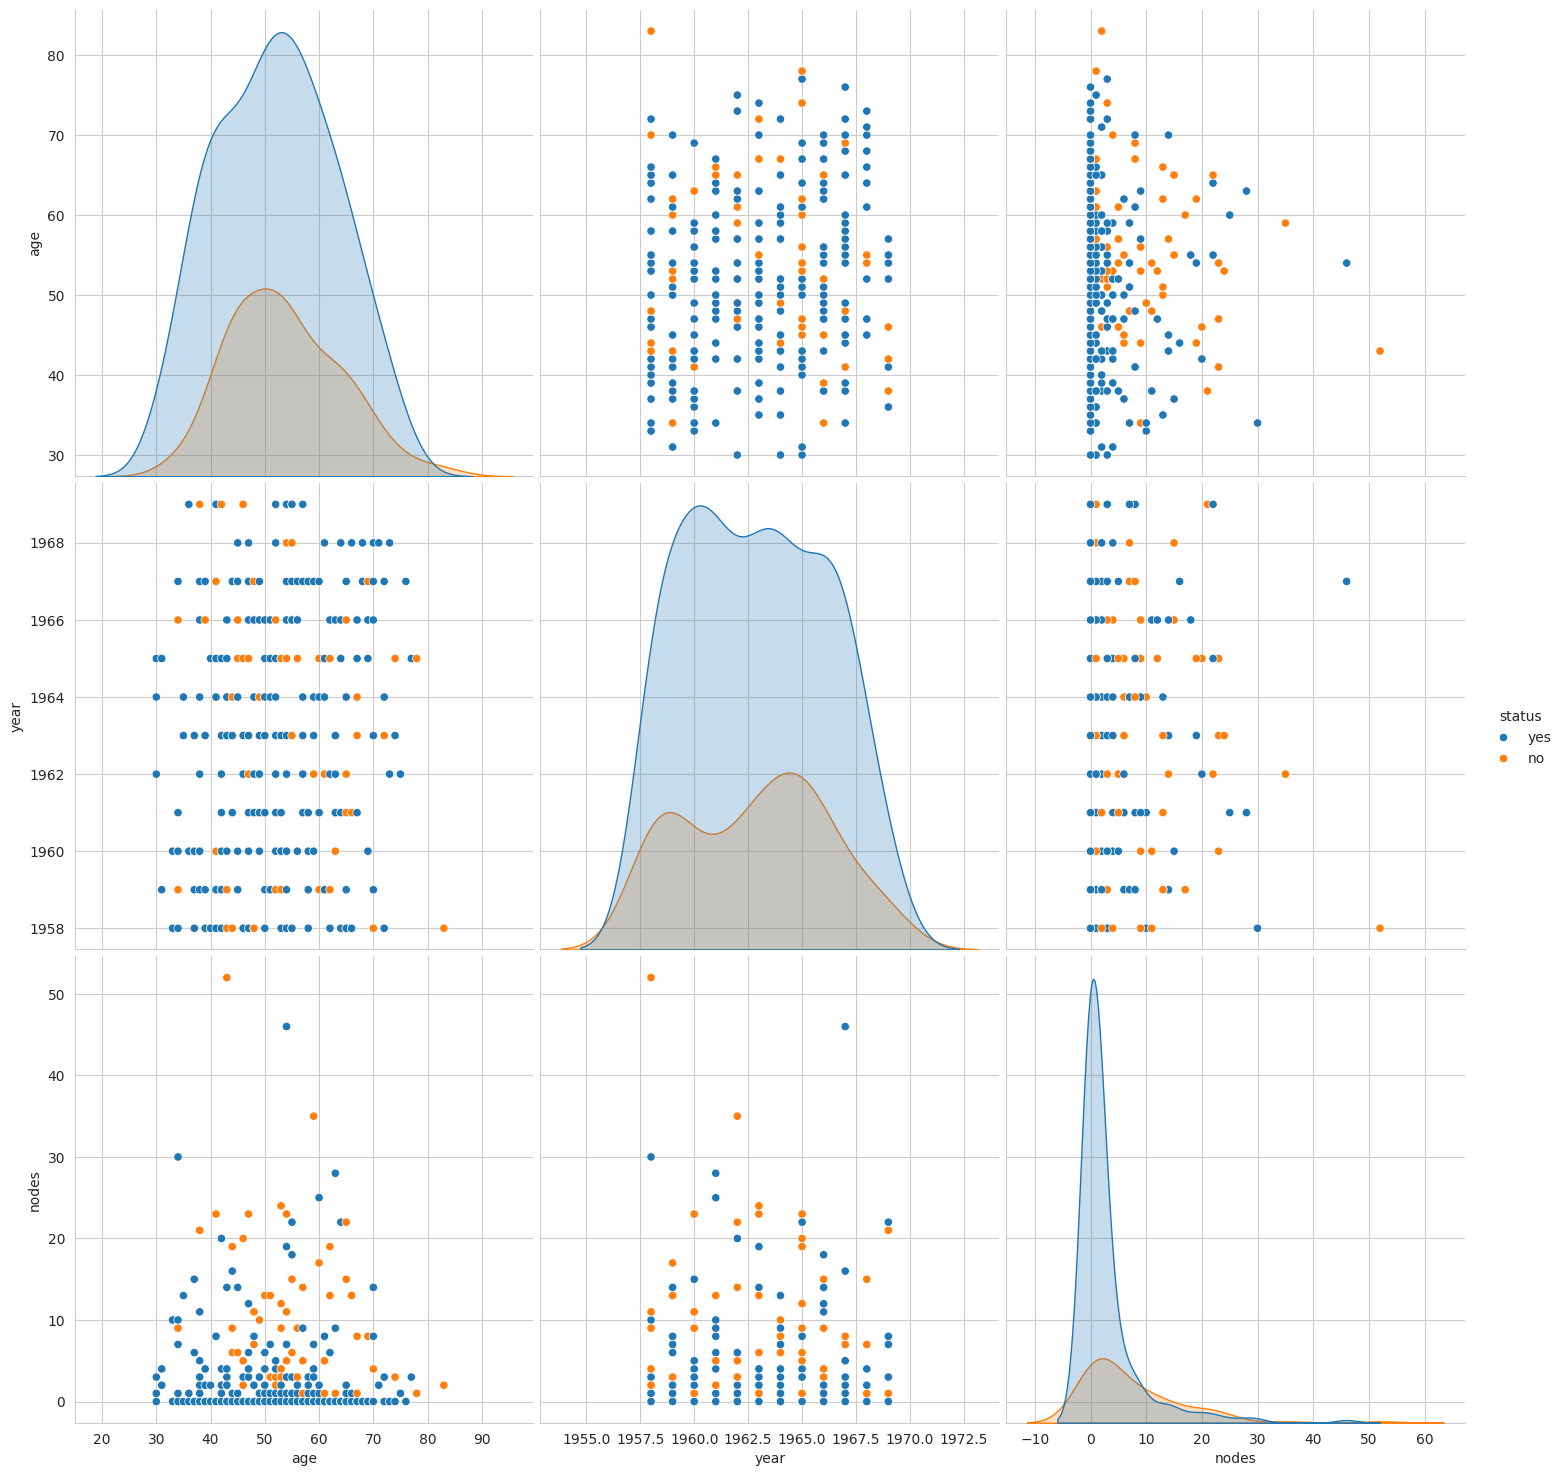

In [468]:
# Create pair-plot to determine a possible relationship between the columns / attributes
sns.set_style("whitegrid")
sns.pairplot(haberman, hue = "status", height = 5)
plt.show()

### Observations:

In the pair-plot between age vs nodes, class variables can be differentiated between each other with two overlapping bell-shaped curves.
For further analysis age and nodes attributes can be considered for pattern finding as you can determine, however vaguely, a relationship.
However, all other attributes did not show much difference in their PDF.

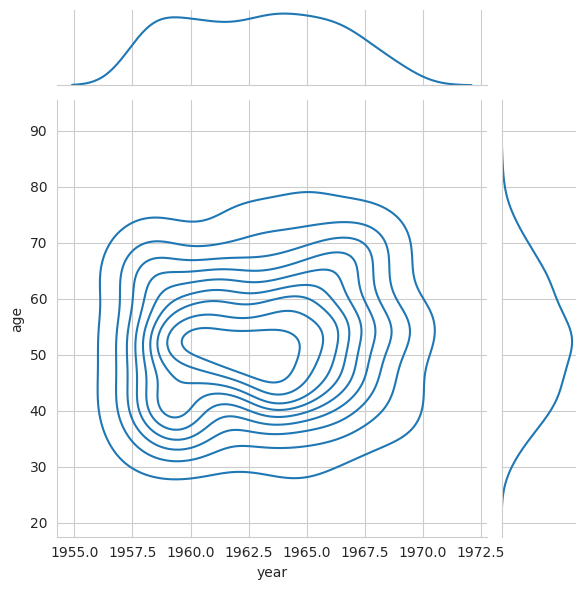

In [469]:
# Create contour plot for the cross section of 3D graph
sns.jointplot(x = "year", y = "age", data = haberman, kind = "kde")
plt.show()

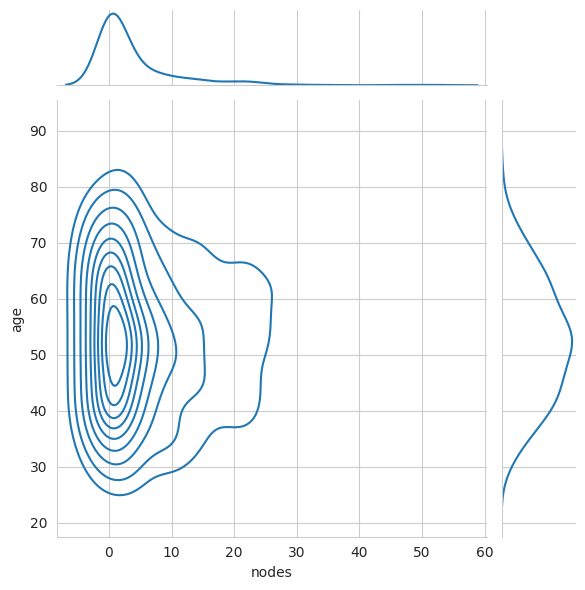

In [470]:
# Create contour plot for the cross section of 3D graph
sns.jointplot(x = "nodes", y = "age", data = haberman, kind = "kde")
plt.show()

### Observations:

From about 1960 to 1964, there were more surgical procedures completed on the patients between the ages 45 and 55.
The majority of patients with 0 to 1 nodes were between 45 to 65 years of age.

# **Conclusions**
Patient’s age and operation year alone is not the lone deciding factors for their survival. Yet, individuals of ages less than 35 years have an increased chance of survival.
The likelihood of survival seems to be inversely proportional to the number of positive axillary nodes discovered in each patient. However, the data has shown that an absence of positive axillary nodes does not always guarantee survival.
The objective of classifying the survival status of a new patient is difficult and will likely produce unreliable results because the dataset needs additional features and attributes.



*   Survival prediction models in the medical field encompass numerous factors affecting cancer diagnosis, treatment options, and ultimately, survival outcomes.
*  Despite dataset limitations, introductory Exploratory Data Analysis (EDA) provides valuable insights into these factors.
*   It's important to recognize and acknowledge the limitations of the model, refraining from utilizing it for critical decision-making.
*  While various classification algorithms such as Logistic Regression and Support Vector Machine can be employed, further steps such as feature engineering and discerning correlation versus causation are essential for model refinement.









# Based on the data I observed, the number of nodes and age were the biggest determining factor in whether a patient lived or died. We could add additional features to this model to increase its accuracy.



---

---


***# Applying Various Supervised Machine Learning Model***


---



---






#Training and Test Set



In [471]:
cols_needed=['age','nodes']
#X=haberman[cols_needed]
X=haberman[cols_needed]
y=haberman['status'].map({'yes': 1, 'no': 0})

In [472]:
X.head()

,age,nodes
0,30,1
1,30,3
2,30,0
3,31,2
4,31,4


In [473]:
X.shape

(306, 2)

In [474]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [475]:
y.shape

(306,)

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=123)

In [478]:
X_train.shape

(244, 2)

In [479]:
y_train.shape

(244,)

In [480]:
X_test.shape

(62, 2)

In [481]:
y_test.shape

(62,)

In [482]:
X_train.head()

,age,nodes
203,57,0
232,61,0
35,39,0
249,63,0
161,53,12


In [483]:
y_train.head()

203    1
232    1
35     1
249    1
161    0
Name: status, dtype: int64

# Steps in Machine Learning

1. Import the model
2. Create an instace of trhe model
3. Fit the model - Train the model
4. Predict
5. Evaluate

--------------------------------------------------------------------------------
#**Naive Bayes**
--------------------------------------------------------------------------------



######MultinomialNB


In [484]:
from sklearn.naive_bayes import MultinomialNB

In [485]:
modelMNB=MultinomialNB()

In [486]:
modelMNB.fit(X_train,y_train)

MultinomialNB()

In [487]:
modelMNB.score(X_test, y_test)

0.7419354838709677

In [488]:
X_test[10:20]

,age,nodes
20,37,0
124,50,13
105,47,4
241,62,6
276,67,0
42,40,0
299,74,3
272,66,0
147,52,4
284,69,0


In [489]:
y_test[10:20]


20     1
124    0
105    1
241    1
276    1
42     1
299    0
272    1
147    1
284    1
Name: status, dtype: int64

In [490]:
modelMNB.predict(X_test[10:20])

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [491]:
modelMNB.predict_proba(X_test[10:20])

array([[0.01996926, 0.98003074],
       [0.99882657, 0.00117343],
       [0.2516173 , 0.7483827 ],
       [0.38403948, 0.61596052],
       [0.0019349 , 0.9980651 ],
       [0.01584971, 0.98415029],
       [0.01623817, 0.98376183],
       [0.0020924 , 0.9979076 ],
       [0.18511534, 0.81488466],
       [0.00165452, 0.99834548]])

In [492]:
#Produce predictions for test data
predictionsMNB = modelMNB.predict(X_test)

######GaussianNB

In [493]:
from sklearn.naive_bayes import GaussianNB

In [494]:
modelGNB=GaussianNB()

In [495]:
modelGNB.fit(X_train,y_train)

GaussianNB()

In [496]:
modelGNB.score(X_test, y_test)

0.7258064516129032

In [497]:
modelGNB.predict(X_test[10:20])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [498]:
y_test[10:20]

20     1
124    0
105    1
241    1
276    1
42     1
299    0
272    1
147    1
284    1
Name: status, dtype: int64

In [499]:
modelGNB.predict_proba(X_test[10:20])

array([[0.11086457, 0.88913543],
       [0.47158033, 0.52841967],
       [0.16704477, 0.83295523],
       [0.24252814, 0.75747186],
       [0.19117947, 0.80882053],
       [0.12182175, 0.87817825],
       [0.20759296, 0.79240704],
       [0.19024811, 0.80975189],
       [0.18438063, 0.81561937],
       [0.19256046, 0.80743954]])

In [500]:
#Produce predictions for test data
predictionsGNB = modelGNB.predict(X_test)

######BernoulliNB

In [501]:
from sklearn.naive_bayes import BernoulliNB

In [502]:
modelBNB=BernoulliNB()

In [503]:
modelBNB.fit(X_train,y_train)

BernoulliNB()

In [504]:
modelBNB.score(X_test, y_test)

0.7580645161290323

In [505]:
modelBNB.predict(X_test[10:20])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [506]:
y_test[10:20]

20     1
124    0
105    1
241    1
276    1
42     1
299    0
272    1
147    1
284    1
Name: status, dtype: int64

In [507]:
modelBNB.predict_proba(X_test[10:20])

array([[0.16877357, 0.83122643],
       [0.34870423, 0.65129577],
       [0.34870423, 0.65129577],
       [0.34870423, 0.65129577],
       [0.16877357, 0.83122643],
       [0.16877357, 0.83122643],
       [0.34870423, 0.65129577],
       [0.16877357, 0.83122643],
       [0.34870423, 0.65129577],
       [0.16877357, 0.83122643]])

In [508]:
#Produce predictions for test data
predictionsBNB = modelBNB.predict(X_test)

###Naive Bayes Result



In [509]:
from sklearn.metrics import confusion_matrix


#####Print confusion matrix as a heatmap

MultinomialNB_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


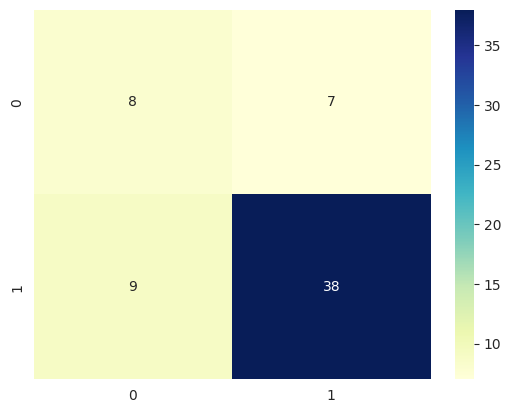

In [510]:
print('MultinomialNB_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictionsMNB), annot = True, fmt = 'd',  cmap='YlGnBu')))

GaussianNB_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


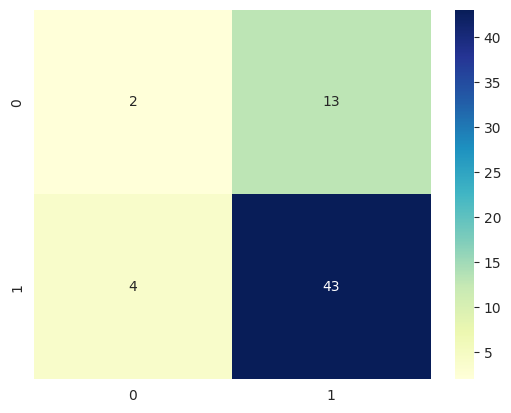

In [511]:
print('GaussianNB_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictionsGNB), annot = True, fmt = 'd',  cmap='YlGnBu')))

BernoulliNB_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


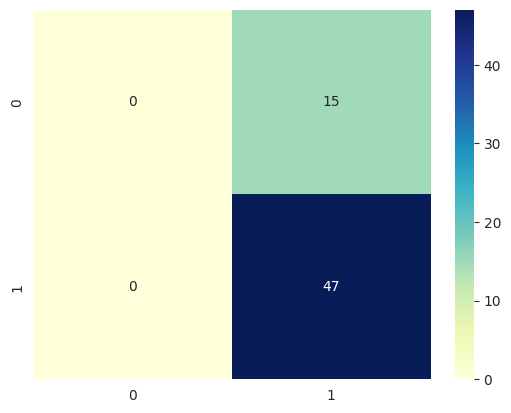

In [512]:
print('BernoulliNB_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictionsBNB), annot = True, fmt = 'd',  cmap='YlGnBu')))

In [513]:
from sklearn.metrics import classification_report
print('MultinomialNB\n{}'.format(classification_report(y_test,predictionsMNB)))
print('GaussianNB\n{}'.format(classification_report(y_test,predictionsGNB)))
print('BernoulliNB\n{}'.format(classification_report(y_test,predictionsBNB)))

MultinomialNB
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.84      0.81      0.83        47

    accuracy                           0.74        62
   macro avg       0.66      0.67      0.66        62
weighted avg       0.75      0.74      0.75        62

GaussianNB
              precision    recall  f1-score   support

           0       0.33      0.13      0.19        15
           1       0.77      0.91      0.83        47

    accuracy                           0.73        62
   macro avg       0.55      0.52      0.51        62
weighted avg       0.66      0.73      0.68        62

BernoulliNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.76      1.00      0.86        47

    accuracy                           0.76        62
   macro avg       0.38      0.50      0.43        62
weighted avg       0.57      0.76    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####Print ROC Curve

In [514]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [515]:
def plot_roc_curve(y_test, predictions):
  """
  plots the roc curve based of the probabilities
  """
  fpr, tpr, thresholds = roc_curve(y_test, predictions)
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

model 1 AUC score: 0.6709219858156028


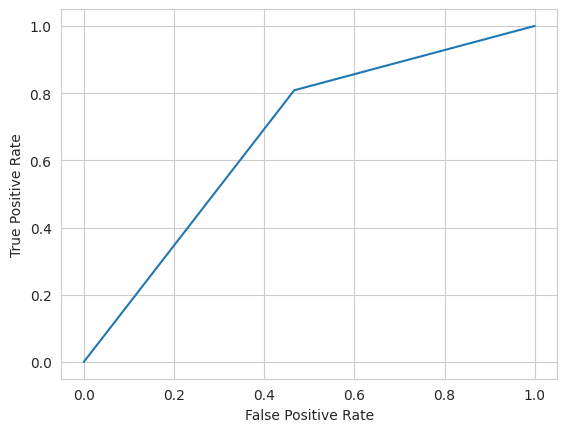

In [516]:
plot_roc_curve(y_test, predictionsMNB)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictionsMNB)}')

model 1 AUC score: 0.5241134751773049


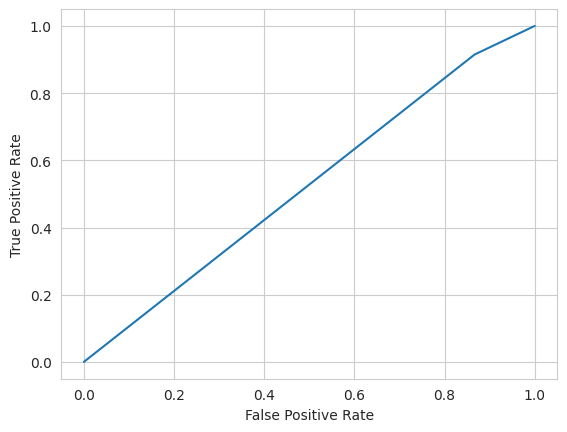

In [517]:
plot_roc_curve(y_test, predictionsGNB)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictionsGNB)}')

model 1 AUC score: 0.5


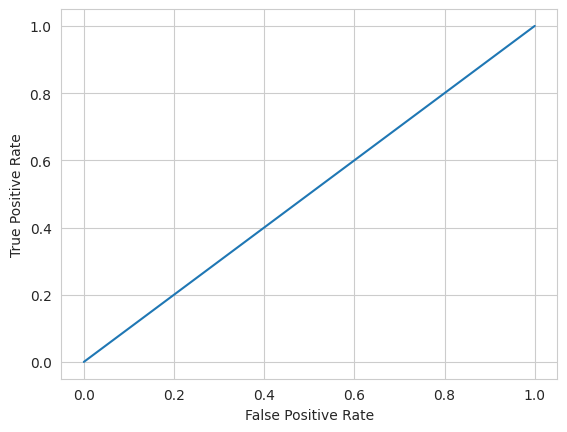

In [518]:
plot_roc_curve(y_test, predictionsBNB)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictionsBNB)}')

#####Precicion Recall Curve

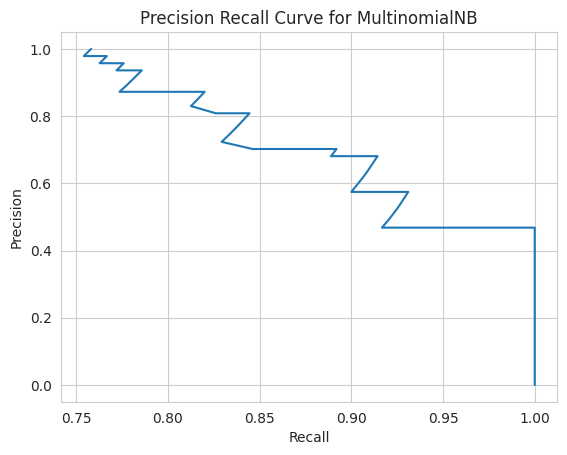

In [519]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
prediction_prob_MNB = modelMNB.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_MNB)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for MultinomialNB')
plt.show()

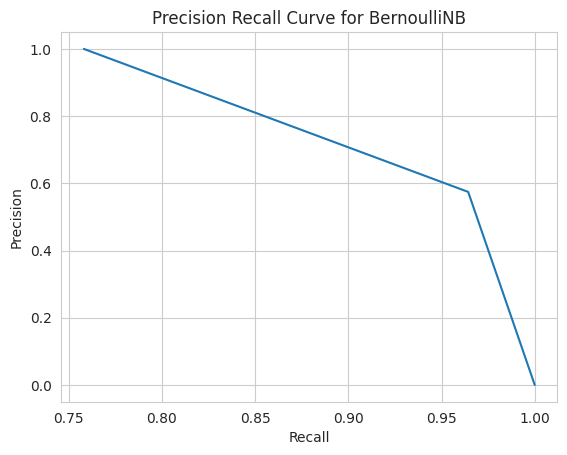

In [520]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
prediction_prob_BNB = modelBNB.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_BNB)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for BernoulliNB')
plt.show()

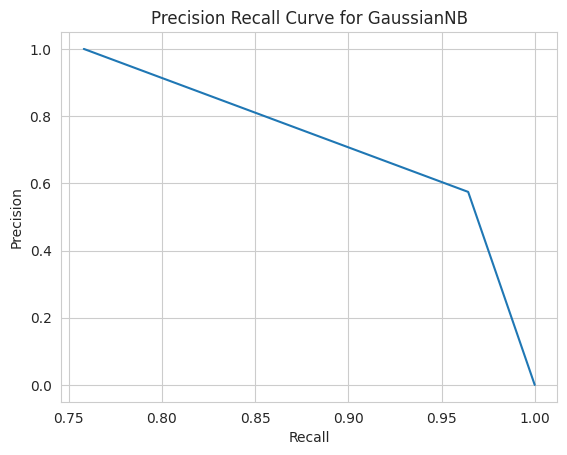

In [521]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
prediction_prob_GNB = modelBNB.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_GNB)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for GaussianNB')
plt.show()

--------------------------------------------------------------------------------
#**Logistic Regression**
--------------------------------------------------------------------------------



In [522]:
#load logistic regression
from sklearn.linear_model import LogisticRegression

In [523]:
#instantiate and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [524]:
# nodes
lr_model.coef_

array([[-0.02602906, -0.08824518]])

In [525]:
#Odds ratio
np.exp(lr_model.coef_)

array([[0.97430677, 0.91553638]])

In [526]:
#Predict for test dataset
predictionsLR = lr_model.predict(X_test)

In [527]:
predictionsLR[1:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [528]:
y_test[1:10]

216    1
194    1
275    1
11     1
204    1
144    0
175    1
71     1
159    0
Name: status, dtype: int64

In [529]:
#How about probabilities prediction
lr_model.predict_proba(X_test[1:10])

array([[0.22592741, 0.77407259],
       [0.22770882, 0.77229118],
       [0.26440077, 0.73559923],
       [0.26899516, 0.73100484],
       [0.21695333, 0.78304667],
       [0.24068644, 0.75931356],
       [0.20398083, 0.79601917],
       [0.16139069, 0.83860931],
       [0.3558506 , 0.6441494 ]])

In [530]:
#Use .score function to get the accuracy of the model
print('training accuracy:', lr_model.score(X_train, y_train))
print('test accuracy:', lr_model.score(X_test, y_test))

training accuracy: 0.75
test accuracy: 0.7419354838709677


In [531]:
#Produce confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictionsLR)
print("confusion matrix\n\n", cm)

confusion matrix

 [[ 2 13]
 [ 3 44]]


<Axes: >

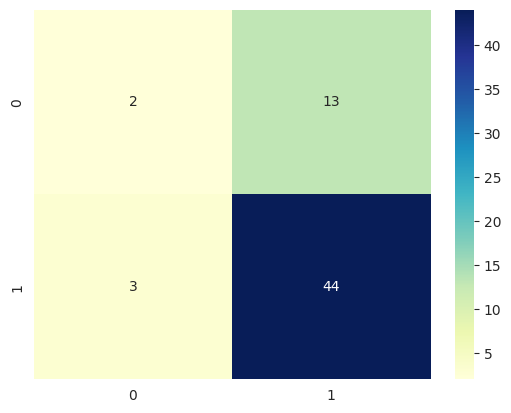

In [532]:
#Print confusion matrix as a heatmap
sns.heatmap(cm, annot = True, fmt = 'd',  cmap='YlGnBu')

In [533]:
from sklearn.metrics import classification_report
print('Logistic Regression\n{}'.format(classification_report(y_test,predictionsLR)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        15
           1       0.77      0.94      0.85        47

    accuracy                           0.74        62
   macro avg       0.59      0.53      0.52        62
weighted avg       0.68      0.74      0.69        62



In [534]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
print(f'accuracy score: {accuracy_score(y_test, predictionsLR)}')


accuracy score: 0.7419354838709677


Logistic regression AUC score: 0.5347517730496454


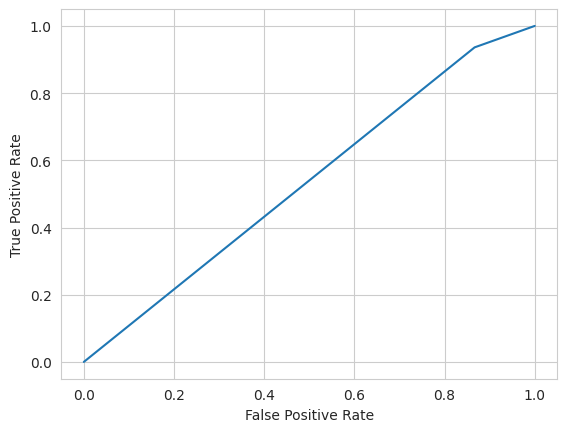

In [535]:
plot_roc_curve(y_test, predictionsLR)
print(f'Logistic regression AUC score: {roc_auc_score(y_test, predictionsLR)}')

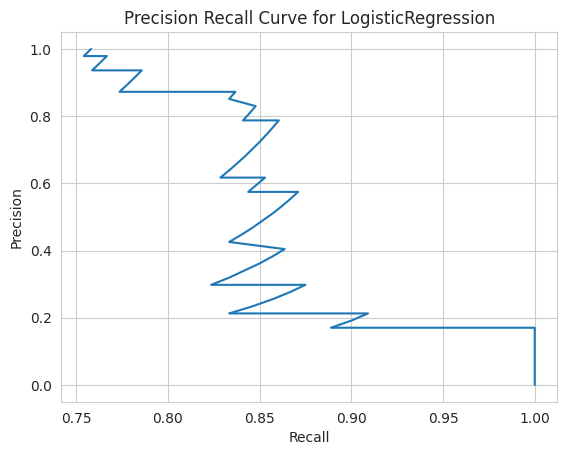

In [536]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
prediction_prob_LR = lr_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_LR)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for LogisticRegression')
plt.show()

--------------------------------------------------------------------------------
#**Support Vector Machine**
--------------------------------------------------------------------------------



### Linear SVC

In [537]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [538]:
svm_clf =  make_pipeline(StandardScaler(),
                          LinearSVC(C = 113, random_state = 123))

In [539]:
#Train the model
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=113, random_state=123))])

In [540]:
#Predict
predictions_SVMLnr = svm_clf.predict(X_test)

In [541]:
#Evaluate
print(accuracy_score(y_test, predictions_SVMLnr))

0.7580645161290323


SVM-Linear_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


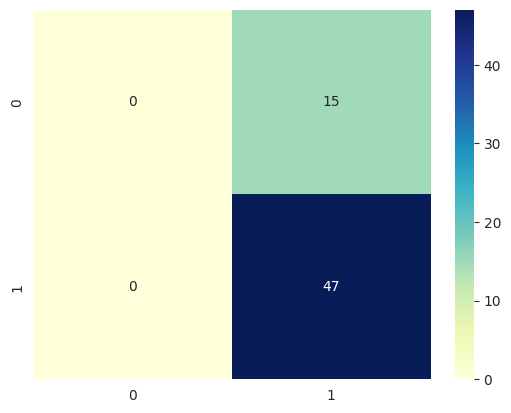

In [542]:
#Produce confusion matrix
from sklearn.metrics import confusion_matrix

print('SVM-Linear_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictions_SVMLnr), annot = True, fmt = 'd',  cmap='YlGnBu')))

In [543]:
from sklearn.metrics import classification_report
print('Linear SVC\n{}'.format(classification_report(y_test,predictions_SVMLnr)))

Linear SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.76      1.00      0.86        47

    accuracy                           0.76        62
   macro avg       0.38      0.50      0.43        62
weighted avg       0.57      0.76      0.65        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVC AUC score: 0.5


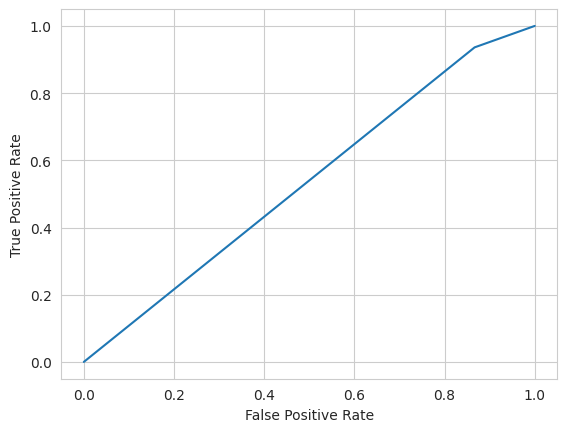

In [544]:
plot_roc_curve(y_test, predictionsLR)
print(f'Linear SVC AUC score: {roc_auc_score(y_test, predictions_SVMLnr)}')

## Polynomial SVC

In [545]:
from sklearn.svm import SVC

In [546]:
poly_kernal_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel = 'poly', degree = 10, coef0 = 1, C = 0.1, random_state = 123))

In [547]:
#fit the model
poly_kernal_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, coef0=1, degree=10, kernel='poly',
                     random_state=123))])

In [548]:
#predict
predictions_poly_kernal_svm = poly_kernal_svm_clf.predict(X_test)

In [549]:
#Evaluate
print(accuracy_score(y_test, predictions_poly_kernal_svm))

0.7741935483870968


SVC_poly_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


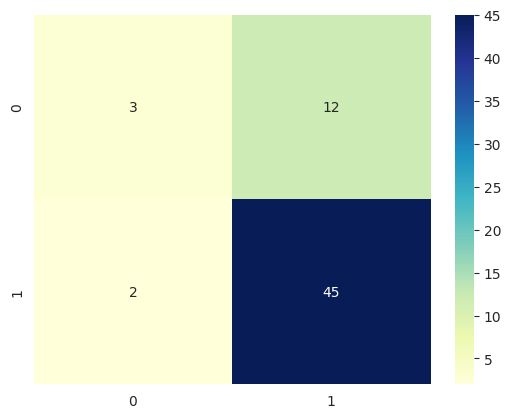

In [550]:
from sklearn.metrics import confusion_matrix

print('SVC_poly_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictions_poly_kernal_svm), annot = True, fmt = 'd',  cmap='YlGnBu')))

In [551]:
from sklearn.metrics import classification_report
print('Poly SVC\n{}'.format(classification_report(y_test,predictions_poly_kernal_svm)))

Poly SVC
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.79      0.96      0.87        47

    accuracy                           0.77        62
   macro avg       0.69      0.58      0.58        62
weighted avg       0.74      0.77      0.73        62



Poly SVC AUC score: 0.5787234042553192


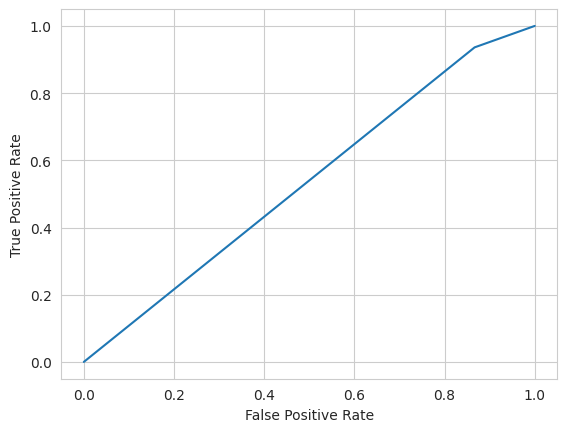

In [552]:
plot_roc_curve(y_test, predictionsLR)
print(f'Poly SVC AUC score: {roc_auc_score(y_test, predictions_poly_kernal_svm)}')

## RBF

In [553]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel = 'rbf', gamma = 0.5, C = 10, random_state = 123))

In [554]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.5, random_state=123))])

In [555]:
predictions_rbf_kernel_svm = rbf_kernel_svm_clf.predict(X_test)

In [556]:
print(accuracy_score(y_test, predictions_rbf_kernel_svm))

0.7580645161290323


SVM-RBF_confusionMatrix
Axes(0.125,0.11;0.62x0.77)


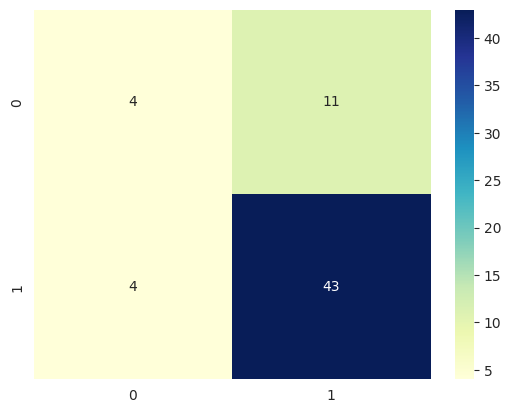

In [557]:
from sklearn.metrics import confusion_matrix

print('SVM-RBF_confusionMatrix\n{}'.format(sns.heatmap(confusion_matrix(y_test, predictions_rbf_kernel_svm), annot = True, fmt = 'd',  cmap='YlGnBu')))

In [558]:
from sklearn.metrics import classification_report
print('RBF SVC\n{}'.format(classification_report(y_test,predictions_rbf_kernel_svm)))

RBF SVC
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.80      0.91      0.85        47

    accuracy                           0.76        62
   macro avg       0.65      0.59      0.60        62
weighted avg       0.72      0.76      0.73        62



RBF SVC AUC score: 0.5907801418439717


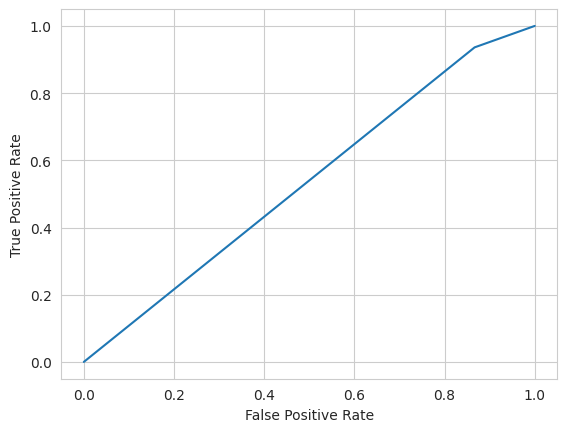

In [559]:
plot_roc_curve(y_test, predictionsLR)
print(f'RBF SVC AUC score: {roc_auc_score(y_test, predictions_rbf_kernel_svm)}')

## Hyperparameter Tuning Using GridSearchCV

In [560]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [561]:
# Create SVC model
svm = SVC()

In [562]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [563]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

###hyperparameter tuning using Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
# Define the parameter distributions
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [ ]:
# Create SVC model
svm = SVC()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

In [ ]:
# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

In [ ]:
# Evaluate the model with best parameters
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)